In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
df = pd.read_csv("D:/Columbia Stat/4771 Machine Learning/HW4/data.csv", header = None)
df = np.array(df)
print(df)

[[   0  206  429 1504  963 2976 3095 2979 1949]
 [ 206    0  233 1308  802 2815 2934 2786 1771]
 [ 429  233    0 1075  671 2684 2799 2631 1616]
 [1504 1308 1075    0 1329 3273 3053 2687 2037]
 [ 963  802  671 1329    0 2013 2142 2054  996]
 [2976 2815 2684 3273 2013    0  808 1131 1307]
 [3095 2934 2799 3053 2142  808    0  379 1235]
 [2979 2786 2631 2687 2054 1131  379    0 1059]
 [1949 1771 1616 2037  996 1307 1235 1059    0]]


In [23]:
x = np.zeros((9,2))
for i in range(9):
    x[i] = 500*np.random.rand(2)
print(x)

[[  2.08631239e+02   4.80638454e+02]
 [  3.34280098e+02   2.50421729e+02]
 [  2.48184895e+02   2.84810768e+02]
 [  4.13103470e+02   1.04504694e+02]
 [  3.67902844e-01   2.09820117e+02]
 [  1.37171221e+02   2.41919560e+02]
 [  3.95984010e+02   4.37365092e+02]
 [  1.25680020e+02   1.40078791e+02]
 [  1.11489523e+02   1.79965691e+02]]


In [4]:
def gradient_descent(x,alpha, iterations, eps=10**(-6)):
    loss=np.inf
    for iteration in range(iterations):
        new_loss = 0
        gradient = np.zeros((9,2))
        # Hypothesis Values
        for i in range(9):
            for j in range(9):
                if i != j:
                    # Gradient Calculation
                    gradient[i] += 2*(x[i]-x[j])-2*df[i,j]*(x[i]-x[j])/np.linalg.norm(x[i] - x[j])
        # Changing Values of B using Gradient
        x = x - alpha * gradient
        for i in range(9):
            for j in range(9):
                if i != j:
                    h = np.linalg.norm(x[i] - x[j])
                    new_loss += (h-df[i,j])**2
        if abs(loss-new_loss)<eps:
            break
        loss=new_loss
        if iteration%10==0:
            print(loss) 
            
    return (x)

In [24]:
x_new = gradient_descent(x, 0.1, 10000)

171930093.445
2831198.05353
1822931.21163
1809014.90457
1807405.64657
235488.149718
56432.6828524
56378.1540694
56374.372058
56374.1078765
56374.0893936
56374.0881
56374.0880094


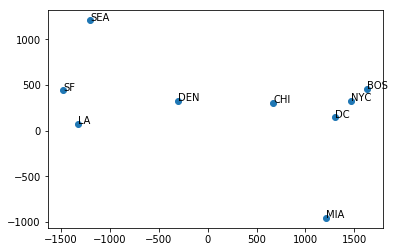

In [25]:
cities=['BOS','NYC','DC','MIA','CHI','SEA','SF','LA','DEN']
fig, ax = plt.subplots()
ax.scatter(x_new[:,0], x_new[:,1])
for i, txt in enumerate(cities):
    ax.annotate(txt, (x_new[i,0], x_new[i,1]))
plt.show()